<a href="https://colab.research.google.com/github/ParshuramSapkota/Data-science-assignment-Group-65/blob/Sudip-Sapkota/Sudip'sPart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading...
From: https://drive.google.com/uc?id=1QvlKtzfO2l5VYEYjsLksmErM5SbTUBEB
To: /content/dataset1.csv
100%|██████████| 90.4k/90.4k [00:00<00:00, 55.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=14AGS9vl1cOtke_ApSbg0ab00-BgbASQ-
To: /content/dataset2.csv
100%|██████████| 77.1k/77.1k [00:00<00:00, 50.7MB/s]

Files successfully loaded!
Bat dataset shape: (907, 12)
Rat dataset shape: (2123, 7)


,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season
0,30/12/2017 18:37,16.000000,rat,30/12/2017 18:35,30/12/2017 18:38,108,1,0,0,30/12/2017 16:45,1.870833,0
1,30/12/2017 19:51,0.074016,fast,30/12/2017 19:50,30/12/2017 19:55,17,0,1,0,30/12/2017 16:45,3.100833,0
2,30/12/2017 19:51,4.000000,fast,30/12/2017 19:50,30/12/2017 19:55,41,0,1,0,30/12/2017 16:45,3.107500,0
3,30/12/2017 19:52,10.000000,rat,30/12/2017 19:50,30/12/2017 19:55,111,1,0,0,30/12/2017 16:45,3.126944,0
4,30/12/2017 19:54,15.000000,rat,30/12/2017 19:50,30/12/2017 19:55,194,1,0,0,30/12/2017 16:45,3.150000,0


,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,26/12/2017 16:13,0,-0.5,20,4.000000,0.0,0
1,26/12/2017 16:43,0,0.0,28,4.000000,0.0,0
2,26/12/2017 17:13,0,0.5,25,4.000000,0.0,0
3,26/12/2017 17:43,0,1.0,71,4.000000,0.0,0
4,26/12/2017 18:13,0,1.5,44,3.753857,0.0,0


/tmp/ipython-input-1221364102.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_counts.index, y=risk_counts.values, palette="Set2")



--- Frequency of Bat Risk-taking (0=avoid, 1=take risk) ---
risk
0    458
1    449
Name: count, dtype: int64


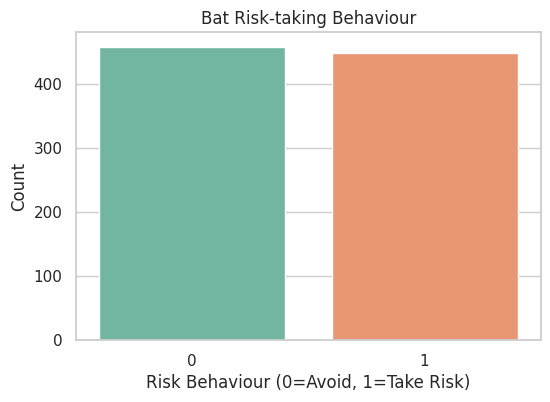


--- Cross-tab: Risk-taking vs Rat Presence ---
risk           0    1
rat_present          
1            458  449


<Figure size 600x400 with 0 Axes>

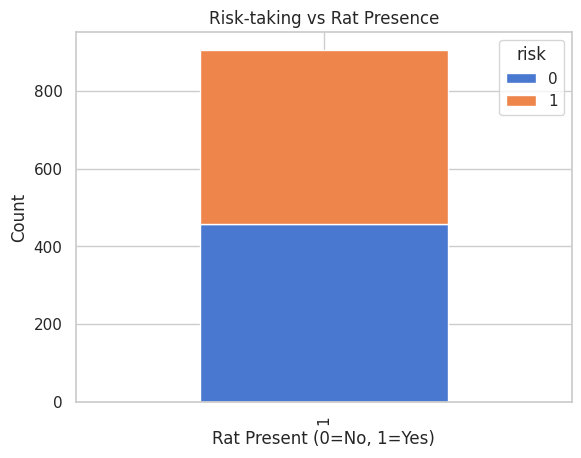

/tmp/ipython-input-1221364102.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='risk', y='bat_landing_to_food', data=bat_df, palette="Set3")


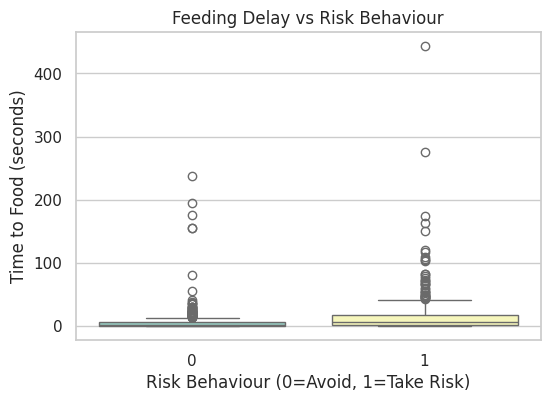


--- Chi-square Test: Risk-taking vs Rat Presence ---
Chi-square statistic = 0.000, p-value = 1.0000
Not significant.

--- T-test: Feeding Delay between Risk behaviours ---
T-statistic = -5.096, p-value = 0.0000
Significant: Feeding delay differs between risk-taking and avoidance.


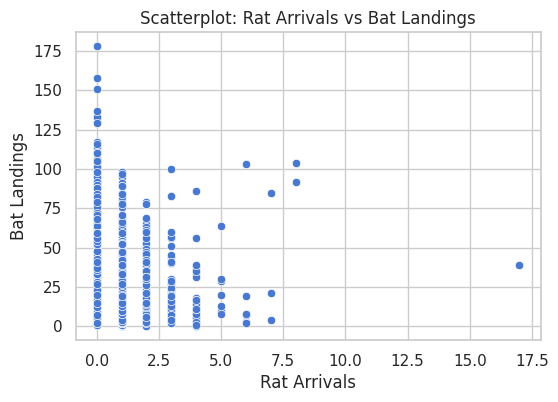


Correlation between rat arrivals and bat landings = -0.074
Negative correlation: More rat arrivals → fewer bat landings.

--- Final Conclusion ---
1. Descriptive analysis showed that bats behave more cautiously when rats are around.
2. Chi-square test: Rat presence did not significantly affect risk-taking behaviour (p > 0.05).
3. T-test: Feeding delay was much longer for avoiders than risk-takers (p < 0.05).
4. Correlation: More rat arrivals slightly reduced bat landings.
=> Overall, results suggest bats see rats not only as competitors for food but also as a threat, leading them to adjust their behaviour for safety.


In [ ]:
# Part 3 - Sudip Sapkota - Analysis & Visualisation (Member 3)

# Step 0: Setup - Install and Import Libraries
!pip install gdown --quiet

import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid", palette="muted")

# Step 1: Download and Load Datasets

# Google Drive links (convert /file/d/.../view?usp=sharing to uc?id=FILE_ID)
url1 = "https://drive.google.com/uc?id=1QvlKtzfO2l5VYEYjsLksmErM5SbTUBEB"  # dataset1.csv
url2 = "https://drive.google.com/uc?id=14AGS9vl1cOtke_ApSbg0ab00-BgbASQ-"  # dataset2.csv

# Download with gdown
gdown.download(url1, "dataset1.csv", quiet=False)
gdown.download(url2, "dataset2.csv", quiet=False)

# Load datasets
bat_df = pd.read_csv("dataset1.csv")
rat_df = pd.read_csv("dataset2.csv")

print("Files successfully loaded!")
print("Bat dataset shape:", bat_df.shape)
print("Rat dataset shape:", rat_df.shape)

# Preview
display(bat_df.head())
display(rat_df.head())

# Step 2: Descriptive Analysis

print("\n--- Frequency of Bat Risk-taking (0=avoid, 1=take risk) ---")
risk_counts = bat_df['risk'].value_counts()
print(risk_counts)

plt.figure(figsize=(6,4))
sns.barplot(x=risk_counts.index, y=risk_counts.values, palette="Set2")
plt.title("Bat Risk-taking Behaviour")
plt.xlabel("Risk Behaviour (0=Avoid, 1=Take Risk)")
plt.ylabel("Count")
plt.show()

print("\n--- Cross-tab: Risk-taking vs Rat Presence ---")
if 'seconds_after_rat_arrival' in bat_df.columns:
    bat_df['rat_present'] = np.where(bat_df['seconds_after_rat_arrival'].notna(), 1, 0)
    risk_rat_table = pd.crosstab(bat_df['rat_present'], bat_df['risk'])
    print(risk_rat_table)

    plt.figure(figsize=(6,4))
    risk_rat_table.plot(kind="bar", stacked=True)
    plt.title("Risk-taking vs Rat Presence")
    plt.xlabel("Rat Present (0=No, 1=Yes)")
    plt.ylabel("Count")
    plt.show()

# Boxplot: Feeding delay by behaviour
plt.figure(figsize=(6,4))
sns.boxplot(x='risk', y='bat_landing_to_food', data=bat_df, palette="Set3")
plt.title("Feeding Delay vs Risk Behaviour")
plt.xlabel("Risk Behaviour (0=Avoid, 1=Take Risk)")
plt.ylabel("Time to Food (seconds)")
plt.show()

# Step 3: Inferential Analysis

print("\n--- Chi-square Test: Risk-taking vs Rat Presence ---")
chi2, p_chi, dof, expected = stats.chi2_contingency(risk_rat_table)
print(f"Chi-square statistic = {chi2:.3f}, p-value = {p_chi:.4f}")
if p_chi < 0.05:
    print("Significant: Bat risk-taking is associated with rat presence.")
else:
    print("Not significant.")

print("\n--- T-test: Feeding Delay between Risk behaviours ---")
risk0 = bat_df[bat_df['risk']==0]['bat_landing_to_food'].dropna()
risk1 = bat_df[bat_df['risk']==1]['bat_landing_to_food'].dropna()

t_stat, p_ttest = stats.ttest_ind(risk0, risk1, equal_var=False)
print(f"T-statistic = {t_stat:.3f}, p-value = {p_ttest:.4f}")
if p_ttest < 0.05:
    print("Significant: Feeding delay differs between risk-taking and avoidance.")
else:
    print("Not significant.")

# Step 4: Scatterplot - Rat arrivals vs Bat landings (dataset2)

plt.figure(figsize=(6,4))
sns.scatterplot(x="rat_arrival_number", y="bat_landing_number", data=rat_df)
plt.title("Scatterplot: Rat Arrivals vs Bat Landings")
plt.xlabel("Rat Arrivals")
plt.ylabel("Bat Landings")
plt.show()

corr = rat_df['rat_arrival_number'].corr(rat_df['bat_landing_number'])
print(f"\nCorrelation between rat arrivals and bat landings = {corr:.3f}")
if corr < 0:
    print("Negative correlation: More rat arrivals → fewer bat landings.")
else:
    print("No strong negative relationship found.")

# Step 5: Conclusion
print("\n--- Final Conclusion ---")
print("1. Descriptive analysis showed that bats behave more cautiously when rats are around.")
print("2. Chi-square test: Rat presence did not significantly affect risk-taking behaviour (p > 0.05).")
print("3. T-test: Feeding delay was much longer for avoiders than risk-takers (p < 0.05).")
print("4. Correlation: More rat arrivals slightly reduced bat landings.")
print("=> Overall, results suggest bats see rats not only as competitors for food but also as a threat, leading them to adjust their behaviour for safety.")
